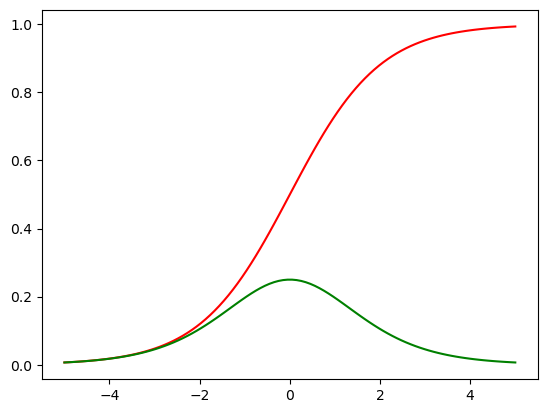

In [1]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()

def g(x):
    return 1 / (1 + np.exp(-x))
def dg(x):
    g_ = g(x)
    return g_*(1-g_)

x = np.linspace(-5,5,100)
y = g(x)

plt.plot(x,y, 'r')

x = np.linspace(-5,5,100)
y = dg(x)

ax = plt.gca()
ax.set_facecolor('w')
plt.plot(x,y, 'g')


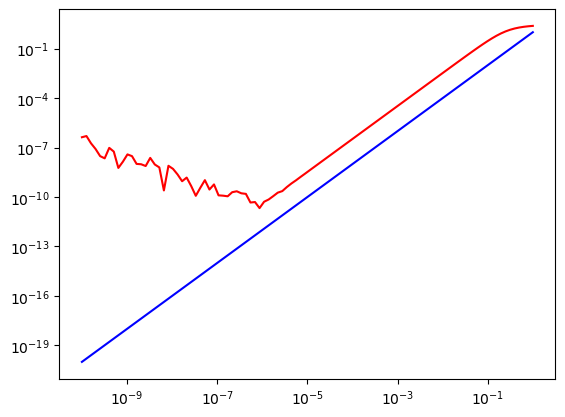

In [2]:

x = np.random.rand(700)
theta = np.zeros_like(x)

def h(x, theta):
    return g( np.dot(theta,x))

def dh(x, theta):
    return dg(np.dot(theta,x))*x

dtheta=np.random.rand(700)
dtheta/=np.sqrt(np.dot(dtheta,dtheta))

def error(x,theta,dtheta,eps):
    return np.abs(h(x,theta+eps*dtheta)-h(x,theta)-eps*np.dot(dh(x,theta),dtheta))/eps

epsvals = np.logspace(-10,0,100)
yE = np.zeros(100)
for i,val in enumerate(epsvals):
    yE[i]= error(x,theta,dtheta,val)
ax= fig.axes
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.loglog(epsvals,yE, 'r')
plt.loglog(epsvals,epsvals**2, 'b')
# plt.plot(epsvals,yE, 'r')
# plt.plot(epsvals,epsvals, 'b')
# ax.set_yscale('log')

In [3]:
numPixel = 28*28
sizeMiddleLayer= 60
outPutLayerSize= 10
x=np.random.rand(numPixel)
theta1 =np.random.rand(sizeMiddleLayer,numPixel+1)/1000
theta2 =np.random.rand(outPutLayerSize,sizeMiddleLayer+1)/1000

In [4]:
z1 = x
a1 = np.hstack([1, x]) # size numPixel+1
# print(a1)

z2 = (theta1@a1) # (sizeMiddleLayer,numPixel+1) x numPixel+1 = sizeMiddleLayer
#print(z2)
a2 = np.hstack([1, g(z2)]) # sizeMiddleLayer (+1) = sizeMiddleLayer+1
#print("a2: ",a2,np.shape(a2))
assert np.shape(a2)[0]==sizeMiddleLayer+1

In [5]:
z3 = theta2@a2 # (outPutLayerSize,sizeMiddleLayer+1) x sizeMiddleLayer+1 = outPutLayerSize
a3 = g(z3)
assert np.shape(a3)[0]==outPutLayerSize

### Backpropagation

In [6]:
y= np.ones(outPutLayerSize)
delta3 = a3-y
assert np.shape(delta3)[0]==outPutLayerSize


delta2 = (np.transpose(theta2)@delta3)[1:] * dg(z2) # (sizeMiddleLayer+1 x outPutLayerSize) * outPutLayerSize .* sizeMiddleLayer   = sizeMiddleLayer+1
print(delta2)

[-0.00060915 -0.00060515 -0.00047366 -0.00066513 -0.00061454 -0.00065318
 -0.00042166 -0.00074628 -0.00061094 -0.00048589 -0.00083165 -0.00061032
 -0.00068688 -0.00055692 -0.00068263 -0.00050457 -0.00061204 -0.00048699
 -0.00067996 -0.0004653  -0.00059181 -0.00060306 -0.0007289  -0.00067333
 -0.0006372  -0.00056458 -0.00068866 -0.00034019 -0.00071197 -0.00069233
 -0.0005811  -0.00077188 -0.00069294 -0.00053563 -0.00062242 -0.00070995
 -0.00058239 -0.00058208 -0.00064263 -0.00068959 -0.00065175 -0.00057267
 -0.00067467 -0.00070338 -0.00053255 -0.00052423 -0.00067501 -0.00051351
 -0.00054722 -0.00064395 -0.00051971 -0.00063015 -0.00076568 -0.00054451
 -0.00078445 -0.00055325 -0.00046463 -0.00049406 -0.00046766 -0.00059147]


In [7]:
# Delta = np.zeros(outPutLayerSize)

a1=np.reshape(a1,(len(a1),1))
a2=np.reshape(a2,(len(a2),1))
print("Shape a1: ",np.shape(a1))
print("Shape a2: ",np.shape(a2))

delta2=np.reshape(delta2,(len(delta2),1))
delta3=np.reshape(delta3,(len(delta3),1))
print("Shape delta2: ",np.shape(delta2))
print("Shape delta3: ",np.shape(delta3))
Delta1 = delta2@np.transpose(a1)
Delta2 = delta3@np.transpose(a2)
print("Shape Delta1: ",np.shape(Delta1))
print("Shape Delta2: ",np.shape(Delta2))
gradJdtheta1 = Delta1/numPixel
gradJdtheta2 = Delta2/numPixel

Shape a1:  (785, 1)
Shape a2:  (61, 1)
Shape delta2:  (60, 1)
Shape delta3:  (10, 1)
Shape Delta1:  (60, 785)
Shape Delta2:  (10, 61)


In [8]:
ndata=1
Y = np.ones((ndata, outPutLayerSize))
X_v = np.random.rand(ndata, 28 * 28)

thetaArray = [np.random.rand(sizeMiddleLayer, numPixel+1),
              np.random.rand(outPutLayerSize, sizeMiddleLayer+1)]


def J(Y_v):
    res = 0

    for i in range(ndata):

        for k in range(outPutLayerSize):
            h_ = a3[k] # (theta_l_ij
            logh = np.log(h_)
            Yik= Y_v[i, k]
            res += -Yik * logh - (1 - Yik) * np.log(1-h_)
    return res/ndata



# def error(x,theta,dtheta,eps):
#     return np.abs(h(x,theta+eps*dtheta)-h(x,theta)-eps*np.dot(dh(x,theta),dtheta))/eps

print(J(Y))


6.847950798972506
